# Dataset Creation (for SA)

This script is for creating balanced dataset for training/testing/validation purpose

It will change the label representing negative sentiment from -1 to 0 for easier training

It does not pre-process the data (e.g. stemming/removing symbols...)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from pathlib import Path
import random

random.seed(13)

dataset_heartless_path = Path('dataset_heartless_20240116.pkl').resolve()

dataset = pd.read_pickle(dataset_heartless_path)
# dataset = dataset.sample(frac=p)      # no sampling is needed

# convert the text to string object
dataset['review_text'] = dataset['review_text'].astype('str')

# drop any duplicate just in case
dataset = dataset.drop_duplicates(subset=['app_id', 'review_text', 'review_score', 'review_votes'], keep='first')

# replace -1 to 0
# then 0 = negative, 1 = positive
# for easier processing
dataset['review_score'] = dataset['review_score'].replace(-1, 0)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180148 entries, 0 to 4180147
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   index         int64 
 1   app_id        int64 
 2   app_name      object
 3   review_text   object
 4   review_score  int64 
 5   review_votes  int64 
dtypes: int64(4), object(2)
memory usage: 191.4+ MB


The number of entries are identical to the one created from dataset_creation_master_20240116.ipynb

In [2]:
dataset['review_text'] = dataset['review_text'].astype('str')

In [3]:
# remove rows have all whitespaces
dataset['num_of_words'] = dataset['review_text'].apply(lambda x:len(str(x).split()))
dataset = dataset[dataset['num_of_words'] > 0]

dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4180003 entries, 0 to 4180147
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   index         int64 
 1   app_id        int64 
 2   app_name      object
 3   review_text   object
 4   review_score  int64 
 5   review_votes  int64 
 6   num_of_words  int64 
dtypes: int64(5), object(2)
memory usage: 255.1+ MB


In [4]:
# remove number of rows that have less than N number of characters

character_limit = 20

dataset = dataset[dataset['review_text'].str.len()>=character_limit]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3990143 entries, 1 to 4180147
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   index         int64 
 1   app_id        int64 
 2   app_name      object
 3   review_text   object
 4   review_score  int64 
 5   review_votes  int64 
 6   num_of_words  int64 
dtypes: int64(5), object(2)
memory usage: 243.5+ MB


In [5]:
dataset.iloc[234800:234900]

,index,app_id,app_name,review_text,review_score,review_votes,num_of_words
249361,314175,12210,Grand Theft Auto IV: The Complete Edition,"Sign in done and put START , just introduce , ...",1,0,21
249362,314176,12210,Grand Theft Auto IV: The Complete Edition,A great open-world game that let's you go wild...,1,0,15
249363,314177,12210,Grand Theft Auto IV: The Complete Edition,Trespassing the toll and got wanted 10/10 Wou...,1,0,10
249364,314178,12210,Grand Theft Auto IV: The Complete Edition,"good game indeed, but the windows live ruined it",1,0,9
249365,314182,12210,Grand Theft Auto IV: The Complete Edition,the game does not work dont buy this,0,0,8
...,...,...,...,...,...,...,...
249464,314299,12210,Grand Theft Auto IV: The Complete Edition,What a mess of a game,0,0,6
249465,314300,12210,Grand Theft Auto IV: The Complete Edition,"So this is my first GTA game and I must say, t...",1,0,142
249466,314301,12210,Grand Theft Auto IV: The Complete Edition,It took me sometime to finally fix the issues ...,1,0,306
249467,314302,12210,Grand Theft Auto IV: The Complete Edition,Make Sure You got a super setup to enjoy this ...,1,0,11


In [6]:
# dataset_copy = dataset.copy()

In [18]:
# regardless of what game is commenting, we only keep unique pair of review_text and review_score (for sentiment analysis)
# we keep other columns for future use (like using LLM to predict the sentiment of the review)

dataset = dataset.drop_duplicates(subset=['review_text', 'review_score'], keep='first')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3953277 entries, 1 to 4180147
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   index         int64 
 1   app_id        int64 
 2   app_name      object
 3   review_text   object
 4   review_score  int64 
 5   review_votes  int64 
 6   num_of_words  int64 
dtypes: int64(5), object(2)
memory usage: 241.3+ MB


In [19]:
# calculate ratio of class 0 and class 1

print('class 1 : class 0 = ', \
    float(len(dataset[dataset['review_score']==1]) / len(dataset[dataset['review_score']==0])))


class 1 : class 0 =  4.887496090666746


In [21]:
temp = dataset.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_score',ascending=True)
temp.style.background_gradient(cmap='Purples')

,review_score,review_text
0,0,671470
1,1,3281807


/var/folders/hm/n8540hpn7xd1f0pw3_qnsp4r0000gn/T/ipykernel_11707/3063829527.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels=['Negative', 'Positive'])


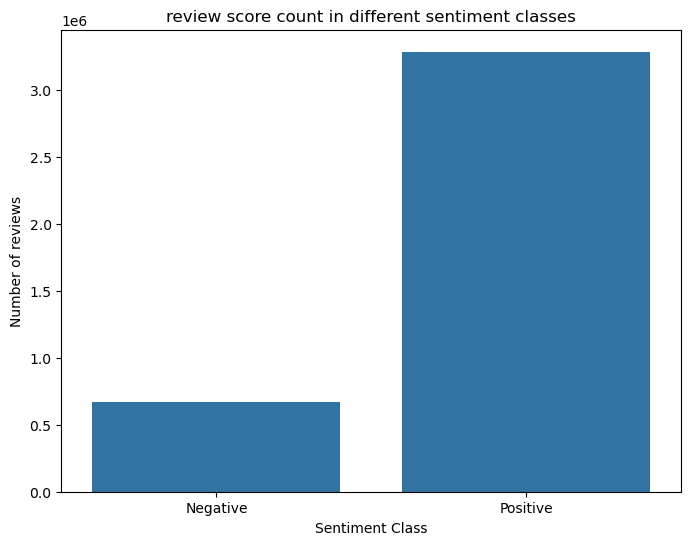

In [22]:
# plot the above result in seaborn

plt.figure(figsize=(8,6))
ax = sns.barplot(temp, x='review_score', y='review_text')
ax.set_title('review score count in different sentiment classes')
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Number of reviews')
ax.set(xticklabels=['Negative', 'Positive'])

plt.show()

---

Create
- A fixed imbalanced validation set (0.1 of the original dataset) (using df.sample func)
- A fixed balanced validation set (0.1 of the original negative samples)
- A subset of dataset for creating training and testing data (due to computational power)

The rest of the data will be for training/testing

No data augmentation will be performed on both of them

Create train-test and validation set

In [23]:
VALIDATION_IMBALANCED_RATIO = 0.2
VALIDATION_BALANCED_RATIO = 0.2

validation_imbalanced_n = int(len(dataset) * VALIDATION_IMBALANCED_RATIO)
validation_balanced_n = int(len(dataset[dataset['review_score']==0]) * VALIDATION_BALANCED_RATIO)

print('validation_imbalanced_n = ', validation_imbalanced_n)
print('validation_balanced_n = ', validation_balanced_n)

validation_imbalanced_n =  790655
validation_balanced_n =  134294


In [24]:
dataset_copy = dataset.copy()

In [25]:
validation_imbalanced_df = dataset.sample(n=validation_imbalanced_n, random_state=2023)

dataset.drop(validation_imbalanced_df.index, inplace=True)

class_0_balanced = dataset[dataset['review_score']==0].sample(n=int(validation_balanced_n), random_state=2024)
class_1_balanced = dataset[dataset['review_score']==1].sample(n=int(validation_balanced_n), random_state=2025)

validation_balanced_df = pd.concat([class_0_balanced, class_1_balanced])
validation_balanced_df = validation_balanced_df.sample(frac=1, random_state=0)

dataset.drop(validation_balanced_df.index, inplace=True)

In [11]:
# X_imbal_valid = validation_imbalanced_df['review_text'].to_numpy()
# y_imbal_valid = validation_imbalanced_df['review_score'].to_numpy()

# X_bal_valid = validation_balanced_df['review_text'].to_numpy()
# y_bal_valid = validation_balanced_df['review_score'].to_numpy()

In [26]:
validation_imbalanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 790655 entries, 2148449 to 4146413
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         790655 non-null  int64 
 1   app_id        790655 non-null  int64 
 2   app_name      790655 non-null  object
 3   review_text   790655 non-null  object
 4   review_score  790655 non-null  int64 
 5   review_votes  790655 non-null  int64 
 6   num_of_words  790655 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 48.3+ MB


In [30]:
temp = validation_imbalanced_df.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_score',ascending=True)
temp.style.background_gradient(cmap='Purples')

,review_score,review_text
0,0,134001
1,1,656654


In [27]:
validation_balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268588 entries, 1011930 to 2547212
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         268588 non-null  int64 
 1   app_id        268588 non-null  int64 
 2   app_name      268588 non-null  object
 3   review_text   268588 non-null  object
 4   review_score  268588 non-null  int64 
 5   review_votes  268588 non-null  int64 
 6   num_of_words  268588 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 16.4+ MB


In [28]:
temp = validation_balanced_df.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_score',ascending=True)
temp.style.background_gradient(cmap='Purples')

,review_score,review_text
0,0,134294
1,1,134294


In [29]:
# remaining comments

temp = dataset.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_score',ascending=True)
temp.style.background_gradient(cmap='Purples')

,review_score,review_text
0,0,403175
1,1,2490859


---

Create training and testing dataset from here :D

Sample a fixed amount of comments from here 

baseline (imbalanced): positive comments : negative comments = 5:1

baseline (balanced): positive comments : negative comments = 1:1

In [32]:
neg_sampled_df = dataset[dataset['review_score']==0]
pos_sampled_df = dataset[dataset['review_score']==1]

# shuffle them
neg_sampled_df = neg_sampled_df.sample(frac=1, random_state=2348)
pos_sampled_df = pos_sampled_df.sample(frac=1, random_state=2349)

In [56]:
POS_NEG_RATIO = 5/1

N_NEG_LIST = [20, 40, 80]
N_NEG_LIST_INDEX = 0

N_total = N_NEG_LIST[N_NEG_LIST_INDEX] * 1000 + int(N_NEG_LIST[N_NEG_LIST_INDEX] * 1000 * POS_NEG_RATIO)

In [57]:
# for imabalnced dataset sampling
n_neg = N_NEG_LIST[N_NEG_LIST_INDEX] * 1000
n_pos = int(n_neg * POS_NEG_RATIO)

# get the negative reviews by sampling
# the negative reviews are the one with review_score = 0
neg_sampled_df_sub = neg_sampled_df.iloc[:n_neg]
pos_sampled_df_sub = pos_sampled_df.iloc[:n_pos]

dataset_imbal = pd.concat([pos_sampled_df_sub, neg_sampled_df_sub])

dataset_imbal = dataset_imbal.sample(frac=1, random_state=0)
dataset_imbal = dataset_imbal.sample(frac=1, random_state=12152350)

In [58]:
# for balanced dataset sampling

n_neg = int(N_total / float(2))
n_pos = n_neg

# get the negative reviews by sampling
# the negative reviews are the one with review_score = 0
# using same seed as imbalanced dataset will result in some same sampled data
# can better conclude that extra negative samples can do better 
neg_sampled_df_sub = neg_sampled_df.iloc[:n_neg]
pos_sampled_df_sub = pos_sampled_df.iloc[:n_pos]

dataset_bal = pd.concat([pos_sampled_df_sub, neg_sampled_df_sub])

dataset_bal = dataset_bal.sample(frac=1, random_state=0)
dataset_bal = dataset_bal.sample(frac=1, random_state=12152350)

In [59]:
dataset_imbal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 2170750 to 3274572
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         120000 non-null  int64 
 1   app_id        120000 non-null  int64 
 2   app_name      120000 non-null  object
 3   review_text   120000 non-null  object
 4   review_score  120000 non-null  int64 
 5   review_votes  120000 non-null  int64 
 6   num_of_words  120000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 7.3+ MB


In [60]:
temp = dataset_imbal.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_score',ascending=True)
temp.style.background_gradient(cmap='Purples')

,review_score,review_text
0,0,20000
1,1,100000


In [61]:
dataset_imbal.head()

,index,app_id,app_name,review_text,review_score,review_votes,num_of_words
2170750,3355255,275490,Canyon Capers,Completing games like this one make me want ...,0,0,40
1087219,1570677,22380,Fallout: New Vegas,A must buy for any fan. Sticks very true to th...,1,0,22
598241,770926,208650,Batman™: Arkham Knight,"The game runs pretty well, as long as you adju...",1,0,71
2004415,3112612,265610,Epic Battle Fantasy 4,Epic Battle Fantasy 4?!?! A new addition to th...,1,0,81
800195,1073139,218230,PlanetSide 2,Wonderfully designed game that will always kee...,1,0,77


In [62]:
dataset_bal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 3010118 to 3274572
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         120000 non-null  int64 
 1   app_id        120000 non-null  int64 
 2   app_name      120000 non-null  object
 3   review_text   120000 non-null  object
 4   review_score  120000 non-null  int64 
 5   review_votes  120000 non-null  int64 
 6   num_of_words  120000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 7.3+ MB


In [63]:
temp = dataset_bal.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_score',ascending=True)
temp.style.background_gradient(cmap='Purples')

,review_score,review_text
0,0,60000
1,1,60000


In [64]:
dataset_bal.head()

,index,app_id,app_name,review_text,review_score,review_votes,num_of_words
3010118,4685933,359550,Tom Clancy's Rainbow Six Siege,game is great but after many updates still s...,0,0,30
1087219,1570677,22380,Fallout: New Vegas,A must buy for any fan. Sticks very true to th...,1,0,22
598241,770926,208650,Batman™: Arkham Knight,"The game runs pretty well, as long as you adju...",1,0,71
2004415,3112612,265610,Epic Battle Fantasy 4,Epic Battle Fantasy 4?!?! A new addition to th...,1,0,81
800195,1073139,218230,PlanetSide 2,Wonderfully designed game that will always kee...,1,0,77


In [65]:
# common rows in both dataset_bal and dataset_imbal

common = pd.merge(dataset_bal, dataset_imbal, how='inner', on=['index'])
common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           80000 non-null  int64 
 1   app_id_x        80000 non-null  int64 
 2   app_name_x      80000 non-null  object
 3   review_text_x   80000 non-null  object
 4   review_score_x  80000 non-null  int64 
 5   review_votes_x  80000 non-null  int64 
 6   num_of_words_x  80000 non-null  int64 
 7   app_id_y        80000 non-null  int64 
 8   app_name_y      80000 non-null  object
 9   review_text_y   80000 non-null  object
 10  review_score_y  80000 non-null  int64 
 11  review_votes_y  80000 non-null  int64 
 12  num_of_words_y  80000 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 7.9+ MB


---

Save dataset for training/testing/validation

In [66]:
from datetime import datetime

today = datetime.today()

dataset_output_folder_path = Path('sampled_{}k_{}/'.format(int(N_total/1000), today.strftime("%Y-%m-%d"))).resolve()
dataset_val_output_folder_path = Path('sampled_valid_{}/'.format(today.strftime("%Y-%m-%d"))).resolve()

if not dataset_output_folder_path.exists():
    dataset_output_folder_path.mkdir(parents=True, exist_ok=True)

if not dataset_val_output_folder_path.exists():
    dataset_val_output_folder_path.mkdir(parents=True, exist_ok=True)

In [67]:
# save datasets

if not Path(dataset_val_output_folder_path, 'validation_balanced.pkl').exists():
    validation_balanced_df.to_pickle(dataset_val_output_folder_path / 'validation_balanced.pkl')

if not Path(dataset_val_output_folder_path, 'validation_imbalanced.pkl').exists():
    validation_imbalanced_df.to_pickle(dataset_val_output_folder_path / 'validation_imbalanced.pkl')

dataset_bal.to_pickle(dataset_output_folder_path / 'dataset_bal_sampled_{}k.pkl'.format(int(N_total/1000)))
dataset_imbal.to_pickle(dataset_output_folder_path / 'dataset_imbal_sampled_{}k.pkl'.format(int(N_total/1000)))
